<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data(y_hat)_multi_delta_(2)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_2'

In [4]:
os.listdir(base_path)

['data_multi_delta_2_n20.csv',
 'data_multi_delta_2_n30.csv',
 'data_multi_delta_2_n60.csv',
 'data_multi_delta_2_n120.csv',
 'data_multi_delta_2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,82.415539,50.881889,67.483505,210.780934,148.492262,62.288671
1,0.0,1.0,42.619672,33.237461,-50.078288,35.778845,80.776868,-44.998023
2,0.0,2.0,59.315167,27.293164,20.896336,117.504667,92.363124,25.141543
3,0.0,3.0,22.532306,95.622606,98.510978,226.665891,136.453384,90.212507
4,0.0,4.0,45.070993,43.987339,51.631178,150.689510,97.127365,53.562145
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,85.002308,66.782994,56.498553,218.283855,161.846797,56.437058
249996,999.0,246.0,33.477476,98.967836,-159.661687,-17.216375,147.986609,-165.202984
249997,999.0,247.0,79.876657,87.972527,-41.050752,136.798432,178.488309,-41.689877
249998,999.0,248.0,99.340151,69.342889,128.098052,306.781092,177.240476,129.540616


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,82.415539,50.881889,67.483505,210.780934,148.492262,62.288671
1,0.0,1.0,42.619672,33.237461,-50.078288,35.778845,80.776868,-44.998023
2,0.0,2.0,59.315167,27.293164,20.896336,117.504667,92.363124,25.141543
3,0.0,3.0,22.532306,95.622606,98.510978,226.665891,136.453384,90.212507
4,0.0,4.0,45.070993,43.987339,51.631178,150.689510,97.127365,53.562145
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,85.002308,66.782994,56.498553,218.283855,161.846797,56.437058
249996,999.0,246.0,33.477476,98.967836,-159.661687,-17.216375,147.986609,-165.202984
249997,999.0,247.0,79.876657,87.972527,-41.050752,136.798432,178.488309,-41.689877
249998,999.0,248.0,99.340151,69.342889,128.098052,306.781092,177.240476,129.540616


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    82.415539  50.881889   67.483505  210.780934  148.492262   
      1.0    42.619672  33.237461  -50.078288   35.778845   80.776868   
      2.0    59.315167  27.293164   20.896336  117.504667   92.363124   
      3.0    22.532306  95.622606   98.510978  226.665891  136.453384   
      4.0    45.070993  43.987339   51.631178  150.689510   97.127365   
...                ...        ...         ...         ...         ...   
999.0 245.0  85.002308  66.782994   56.498553  218.283855  161.846797   
      246.0  33.477476  98.967836 -159.661687  -17.216375  147.986609   
      247.0  79.876657  87.972527  -41.050752  136.798432  178.488309   
      248.0  99.340151  69.342889  128.098052  306.781092  177.240476   
      249.0  38.278619  77.973895  147.275459  273.527974  131.250682   

                  e_hat  
rep   index              
0.0   0.0     62.288671  
      1.0    -44.998023  
      2.0     25.141543  
      3.0     90.212507  
      4.0     53.562145  
...                 ...  
999.0 245.0   56.437058  
      246.0 -165.202984  
      247.0  -41.689877  
      248.0  129.540616  
      249.0  142.277292  

[250000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    82.415539  50.881889   67.483505  210.780934  148.492262   
      1.0    42.619672  33.237461  -50.078288   35.778845   80.776868   
      2.0    59.315167  27.293164   20.896336  117.504667   92.363124   
      3.0    22.532306  95.622606   98.510978  226.665891  136.453384   
      4.0    45.070993  43.987339   51.631178  150.689510   97.127365   
...                ...        ...         ...         ...         ...   
999.0 245.0  85.002308  66.782994   56.498553  218.283855  161.846797   
      246.0  33.477476  98.967836 -159.661687  -17.216375  147.986609   
      247.0  79.876657  87.972527  -41.050752  136.798432  178.488309   
      248.0  99.340151  69.342889  128.098052  306.781092  177.240476   
      249.0  38.278619  77.973895  147.275459  273.527974  131.250682   

                  e_hat  
rep   index              
0.0   0.0     62.288671  
      1.0    -44.998023  
      2.0     25.141543  
      3.0     90.212507  
      4.0     53.562145  
...                 ...  
999.0 245.0   56.437058  
      246.0 -165.202984  
      247.0  -41.689877  
      248.0  129.540616  
      249.0  142.277292  

[250000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,82.415539,50.881889,67.483505,210.780934,148.492262,62.288671
1,0.0,1.0,42.619672,33.237461,-50.078288,35.778845,80.776868,-44.998023
2,0.0,2.0,59.315167,27.293164,20.896336,117.504667,92.363124,25.141543
3,0.0,3.0,22.532306,95.622606,98.510978,226.665891,136.453384,90.212507
4,0.0,4.0,45.070993,43.987339,51.631178,150.689510,97.127365,53.562145
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,85.002308,66.782994,56.498553,218.283855,161.846797,56.437058
249996,999.0,246.0,33.477476,98.967836,-159.661687,-17.216375,147.986609,-165.202984
249997,999.0,247.0,79.876657,87.972527,-41.050752,136.798432,178.488309,-41.689877
249998,999.0,248.0,99.340151,69.342889,128.098052,306.781092,177.240476,129.540616


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    82.415539  50.881889   67.483505  210.780934  148.492262   
      1.0    42.619672  33.237461  -50.078288   35.778845   80.776868   
      2.0    59.315167  27.293164   20.896336  117.504667   92.363124   
      3.0    22.532306  95.622606   98.510978  226.665891  136.453384   
      4.0    45.070993  43.987339   51.631178  150.689510   97.127365   
...                ...        ...         ...         ...         ...   
999.0 245.0  85.002308  66.782994   56.498553  218.283855  161.846797   
      246.0  33.477476  98.967836 -159.661687  -17.216375  147.986609   
      247.0  79.876657  87.972527  -41.050752  136.798432  178.488309   
      248.0  99.340151  69.342889  128.098052  306.781092  177.240476   
      249.0  38.278619  77.973895  147.275459  273.527974  131.250682   

                  e_hat  
rep   index              
0.0   0.0     62.288671  
      1.0    -44.998023  
      2.0     25.141543  
      3.0     90.212507  
      4.0     53.562145  
...                 ...  
999.0 245.0   56.437058  
      246.0 -165.202984  
      247.0  -41.689877  
      248.0  129.540616  
      249.0  142.277292  

[250000 rows x 6 columns]

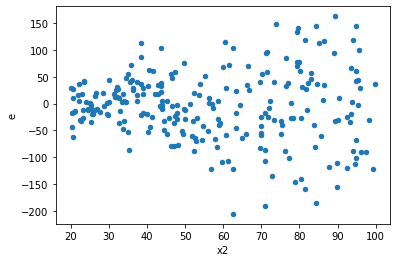

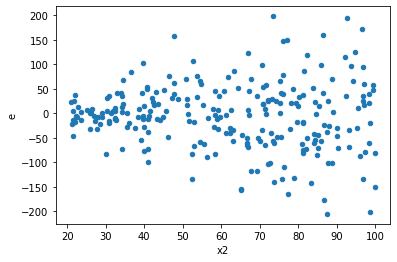

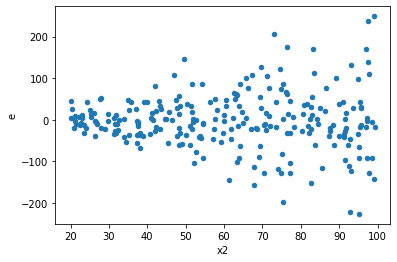

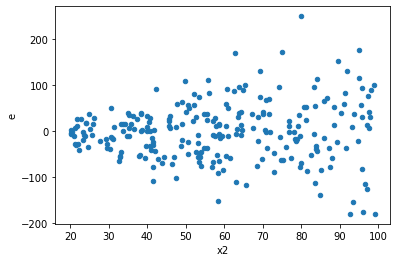

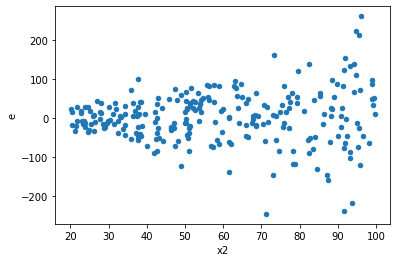

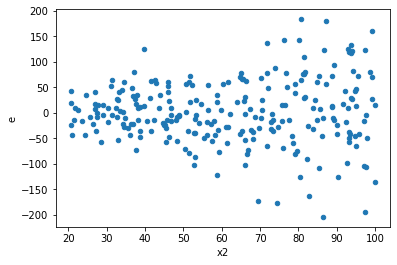

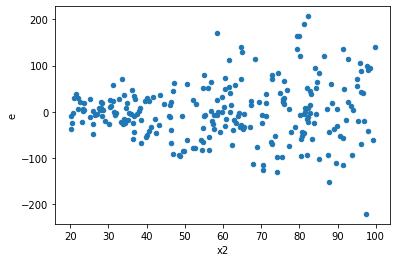

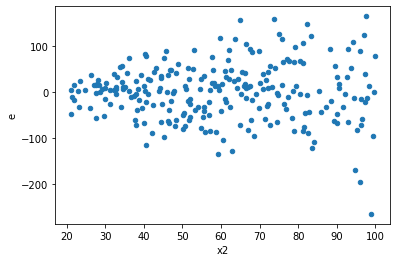

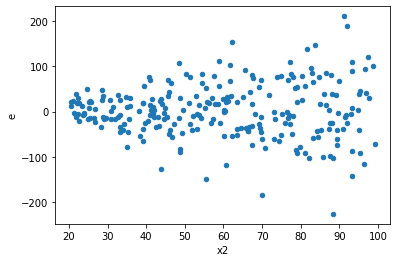

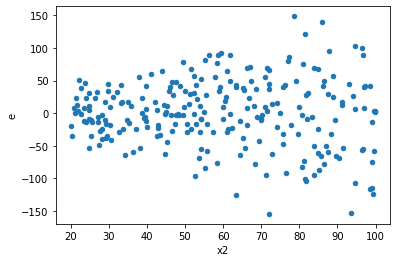

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,98.0,98.0,164340.64147542432,622700.1605321754,1676.945321177799,6354.083270736484,3.7890819637897954,2.071578464324375e-10,0.9999999998964211,1.0357892321621875e-10,Reject005=0 : Heteroscedasticity
1.0,98.0,98.0,252337.11509950727,608106.918497196,2574.8685214235434,6205.17263772649,2.4098988302112976,1.9053864604989812e-05,0.9999904730676975,9.526932302494906e-06,Reject005=0 : Heteroscedasticity
2.0,98.0,98.0,347674.42698683613,699183.5079046758,3547.6982345595525,7134.525590864038,2.011029439134299,0.0006372165367964922,0.9996813917316018,0.0003186082683982461,Reject005=0 : Heteroscedasticity
3.0,98.0,98.0,203708.81985813435,503732.9447897309,2078.66142712382,5140.132089691131,2.472808713636147,1.0973288164350947e-05,0.9999945133559178,5.486644082175474e-06,Reject005=0 : Heteroscedasticity
4.0,98.0,98.0,372650.85734001594,563967.8594508239,3802.5597687756726,5754.774076028815,1.5133947724592127,0.04149995427013975,0.9792500228649301,0.020749977135069875,Reject005=0 : Heteroscedasticity
5.0,98.0,98.0,275171.96843581274,693290.33884526,2807.877228936865,7074.391212706734,2.5194802464298918,7.294910551847167e-06,0.9999963525447241,3.6474552759235834e-06,Reject005=0 : Heteroscedasticity
6.0,98.0,98.0,197661.95508084737,467581.62437977036,2016.958725314769,4771.241065099697,2.365562073837228,2.8134516847355684e-05,0.9999859327415763,1.4067258423677842e-05,Reject005=0 : Heteroscedasticity
7.0,98.0,98.0,232952.3872224007,533386.1095128244,2377.0651757387827,5442.715403192086,2.2896786586848683,5.488088835292615e-05,0.9999725595558235,2.7440444176463075e-05,Reject005=0 : Heteroscedasticity
8.0,98.0,98.0,198732.15033525383,462768.07676779386,2027.8790850536104,4722.123232324427,2.3286019699737617,3.8950542815552325e-05,0.9999805247285922,1.9475271407776162e-05,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,98.0,98.0,164340.64147542432,622700.1605321754,1676.945321177799,6354.083270736484,3.7890819637897954,2.071578464324375e-10,Reject005=0 : Heteroscedasticity
1.0,98.0,98.0,252337.11509950727,608106.918497196,2574.8685214235434,6205.17263772649,2.4098988302112976,1.9053864604989812e-05,Reject005=0 : Heteroscedasticity
2.0,98.0,98.0,347674.42698683613,699183.5079046758,3547.6982345595525,7134.525590864038,2.011029439134299,0.0006372165367964922,Reject005=0 : Heteroscedasticity
3.0,98.0,98.0,203708.81985813435,503732.9447897309,2078.66142712382,5140.132089691131,2.472808713636147,1.0973288164350947e-05,Reject005=0 : Heteroscedasticity
4.0,98.0,98.0,372650.85734001594,563967.8594508239,3802.5597687756726,5754.774076028815,1.5133947724592127,0.04149995427013975,Reject005=0 : Heteroscedasticity
5.0,98.0,98.0,275171.96843581274,693290.33884526,2807.877228936865,7074.391212706734,2.5194802464298918,7.294910551847167e-06,Reject005=0 : Heteroscedasticity
6.0,98.0,98.0,197661.95508084737,467581.62437977036,2016.958725314769,4771.241065099697,2.365562073837228,2.8134516847355684e-05,Reject005=0 : Heteroscedasticity
7.0,98.0,98.0,232952.3872224007,533386.1095128244,2377.0651757387827,5442.715403192086,2.2896786586848683,5.488088835292615e-05,Reject005=0 : Heteroscedasticity
8.0,98.0,98.0,198732.15033525383,462768.07676779386,2027.8790850536104,4722.123232324427,2.3286019699737617,3.8950542815552325e-05,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    967
Reject005=1 : Homoscedasticity       33
Name: Result_test, dtype: int64